# 3. Lasso Regression Analysis

## Setup

In [128]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [129]:
# Load data
data = pd.read_csv('data/Ames_Housing_Price_Data_encoded.csv')

In [130]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

In [131]:
print(predictors.columns)

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_VWD',
       'SaleType_WD ', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=243)


In [132]:
# Categorize columns of the independent variables
numeric_columns = predictors.select_dtypes(['int64', 'uint8', 'float64']).columns
categorical_columns = predictors.columns.difference(numeric_columns)

## Preprocessing

In [133]:
# Check for missing values
print(predictors.isnull().sum().any())

False


In [134]:
# Check that all columns are numeric by counting dtypes
print(predictors.dtypes.value_counts())

int64      231
float64     12
dtype: int64


In [135]:
# Scale the numeric data
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Convert the scaled data to a dataframe
predictors_scaled = pd.DataFrame(predictors_scaled, columns=predictors.columns)

In [136]:
# View scaled data
predictors_scaled.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.289220,-0.647048,-1.681767,-0.274310,-0.034027,0.340062,-0.562894,-0.480081,-0.305286,0.185818,...,-0.055782,-0.177764,-0.039413,-0.019695,0.280407,-0.027859,-0.039413,-0.081458,0.262286,-0.181216
1,-0.894237,1.455666,-0.425773,-0.724056,-0.765323,-0.551218,0.285939,0.251292,1.948282,-1.022958,...,-0.055782,-0.177764,-0.039413,-0.019695,0.280407,-0.027859,-0.039413,-0.081458,0.262286,-0.181216
2,-0.992472,-0.647048,0.112511,-0.499491,-0.765323,3.013900,-0.562894,0.682197,-0.305286,-1.032365,...,-0.055782,-0.177764,-0.039413,-0.019695,0.280407,-0.027859,-0.039413,-0.081458,0.262286,-0.181216
3,-0.914703,0.287491,0.710603,-0.242810,-1.496619,2.122620,-0.562894,-1.034433,-0.305286,-0.315095,...,-0.055782,-0.177764,-0.039413,-0.019695,0.280407,-0.027859,-0.039413,-0.081458,0.262286,-0.181216
4,0.366433,0.053856,0.411557,-0.211555,1.428565,0.340062,-0.562894,0.463251,-0.305286,-0.874800,...,-0.055782,-0.177764,-0.039413,-0.019695,0.280407,-0.027859,-0.039413,-0.081458,0.262286,-0.181216


## Perform Train-Test Split

In [137]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, target, random_state=0) # normalize=True has been deprecated for LassoCV, so we will use predictors_scaled

## Training the Lasso Model

In [138]:
# Set up the data for training
# X = predictors_scaled
# y = target

In [139]:
# Initialize the Lasso model with cross-validation
alphas = np.logspace(-4, 1, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=0, normalize=True) 

In [140]:
# Fit the model
lasso_cv.fit(X_train, y_train)

/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(alphas=array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]),
        cv=5, max_iter=10000, normalize=True, random_state=0)

In [141]:
# Print the Optimal Value of Alpha
print('Optimal alpha:', lasso_cv.alpha_)

Optimal alpha: 10.0


In [142]:
# Predict the training set
y_pred_train = lasso_cv.predict(X_train)

# Predict the test set
y_pred_test = lasso_cv.predict(X_test)

## Model Evaluation

In [143]:
# Calculate and print metrics for training set
print('Training set metrics:')
print('R^2: {}'.format(r2_score(y_train, y_pred_train)))

Training set metrics:
R^2: 0.9196495545422226


In [144]:
# Calculate and print metrics for test set
print('Test set metrics:')
print('R^2: {}'.format(r2_score(y_test, y_pred_test)))

Test set metrics:
R^2: 0.9167719192734286


In [145]:
# Print the Intercept
print('Intercept:', lasso_cv.intercept_)

Intercept: 177982.43812304793


In [146]:
# Print the Slopes
lassoCoef = pd.Series(lasso_cv.coef_, index=predictors.columns)
print('Slopes:', lasso_cv.coef_)

Slopes: [ 2.59148145e+04 -2.21760153e+03  8.03242288e+02  1.99901511e+03
  1.26512830e+04  5.13622420e+03  5.23149255e+03  7.96023247e+03
  1.35486042e+03 -0.00000000e+00  8.19538043e+03  0.00000000e+00
  0.00000000e+00 -5.37724293e+02  5.76891167e+02 -0.00000000e+00
  0.00000000e+00  5.15662721e+02 -2.97809836e+03 -2.59633359e+03
  1.43121200e+03  3.32662325e+03 -0.00000000e+00  1.72873585e+03
  3.71788451e+03  1.08429511e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.86837463e+02 -5.86085466e+02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -9.29222156e+03 -5.68548975e+03
 -2.22756348e+03 -2.64071132e+01 -4.81393091e+01 -0.00000000e+00
  0.00000000e+00 -5.58147059e+02  0.00000000e+00 -0.00000000e+00
  1.14863477e+02  1.42591181e+02 -8.35287112e+01  6.98022277e+02
  0.00000000e+00 -5.60885136e+01  1.68415167e+03 -1.66151651e+02
  1.26645835e+01  0.00000000e+00  1.15206190e+03 -7.24000551e+02
 -0.00000000e+00  0.00000000e+00  2.01041246e+01 -3.79428020e+02
 -0.00000000e+00 

## Feature Importances

In [150]:
# Find the top 5 features
feature_importances = lassoCoef[lassoCoef > 0].sort_values(ascending=False)
feature_importances.head(5)

GrLivArea      25914.814532
OverallQual    12651.282986
TotalBsmtSF     8195.380430
BsmtFinSF1      7960.232473
MasVnrArea      5231.492555
dtype: float64

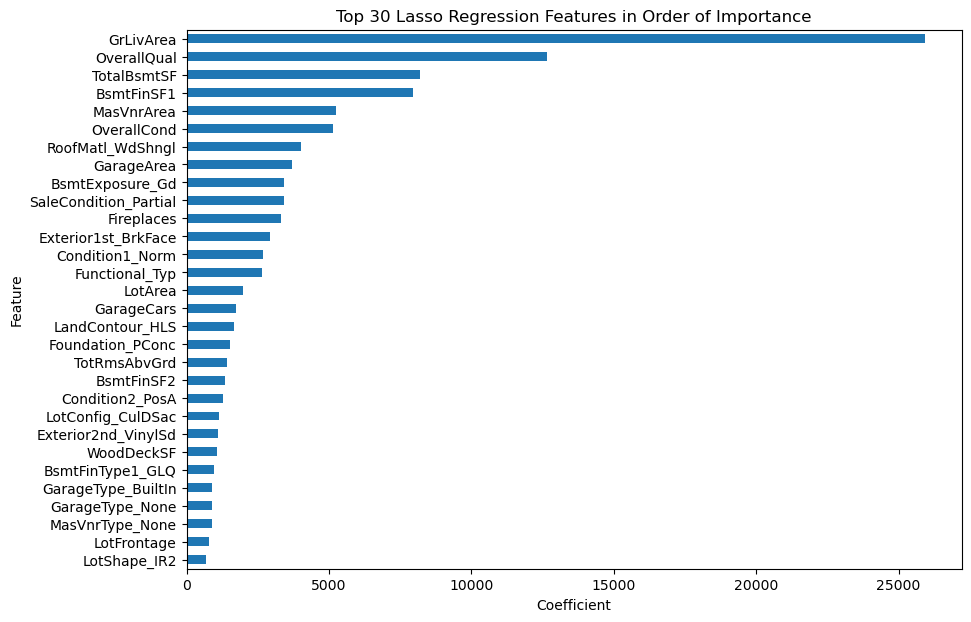

In [151]:
# Get the top 30 features
feature_importances_top_30 = feature_importances.head(30)

# Create a bar chart
feature_importances_top_30.sort_values().plot(kind='barh', figsize=(10, 7))

# Labels and titles
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 30 Lasso Regression Features in Order of Importance')

# Show the plot
plt.show()

In [149]:
# Get the features with coefficients of 0
features_zeroes = lassoCoef[lassoCoef == 0]
print(features_zeroes.index.tolist())
print('Number of features with coefficients of 0:', len(features_zeroes))

['BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtHalfBath', 'FullBath', 'GarageYrBlt', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_I (all)', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Utilities_NoSewr', 'LotConfig_FR3', 'LotConfig_Inside', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CB